In [1]:
%matplotlib inline
import math
import random
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats.stats import pearsonr

from sklearn import tree
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
from sklearn import neighbors
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

c:\users\ahmad\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df_train = pd.read_csv("diabetes_preprocessed.csv") 

In [3]:
df_train.head()

,DiabetesPedigreeFunction,Age,GlucoseFill,BloodPressureFill,BMIFill,Pregnancies,Outcome
0,0.627,50,148.0,72.0,33.6,6,1
1,0.351,31,85.0,66.0,26.6,1,0
2,0.672,32,183.0,64.0,23.3,8,1
3,0.167,21,89.0,66.0,28.1,1,0
4,0.201,30,116.0,74.0,25.6,5,0


In [4]:
#Convert the DataFrame to a numpy array:
train_data = df_train.values
train_data

array([[   0.627,   50.   ,  148.   , ...,   33.6  ,    6.   ,    1.   ],
       [   0.351,   31.   ,   85.   , ...,   26.6  ,    1.   ,    0.   ],
       [   0.672,   32.   ,  183.   , ...,   23.3  ,    8.   ,    1.   ],
       ..., 
       [   0.245,   30.   ,  121.   , ...,   26.2  ,    5.   ,    0.   ],
       [   0.349,   47.   ,  126.   , ...,   30.1  ,    1.   ,    1.   ],
       [   0.315,   23.   ,   93.   , ...,   30.4  ,    1.   ,    0.   ]])

In [5]:
# Training data features, skip the first column 'Outcome'
train_features = train_data[:, :6]

# 'Outcome' column values
train_target = train_data[:, 6]

In [6]:
train_features[0]

array([   0.627,   50.   ,  148.   ,   72.   ,   33.6  ,    6.   ])

In [7]:
train_target[0]

1.0

In [8]:
# Fit the model to our training data
clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=9, 
                                  min_samples_split=2, min_samples_leaf=10)
clf = clf.fit(train_features, train_target)

In [9]:
clf.feature_importances_

array([ 0.1048367 ,  0.15241694,  0.45240475,  0.03464445,  0.18124761,
        0.07444955])

In [10]:
pred_target = clf.predict(train_features)

print ('Precision :',metrics.precision_score(train_target, pred_target, average='weighted'))
print ('Recall :',metrics.recall_score(train_target, pred_target, average='weighted'))
print ('F1 :',metrics.f1_score(train_target, pred_target, average='weighted'))
print ('Accuracy ',metrics.accuracy_score(train_target, pred_target))
print ('precision_recall_fscore_support',metrics.precision_recall_fscore_support(train_target, pred_target))

Precision : 0.866151618606
Recall : 0.866571018651
F1 : 0.86516169026
Accuracy  0.866571018651
precision_recall_fscore_support (array([ 0.87061404,  0.85892116]), array([ 0.92111369,  0.77819549]), array([ 0.8951522 ,  0.81656805]), array([431, 266], dtype=int64))


In [11]:
# Fit the model to our training data
clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, 
                                  min_samples_split=2, min_samples_leaf=2)
clf = clf.fit(train_features, train_target)

In [12]:
clf.feature_importances_

array([ 0.14565389,  0.11773122,  0.39629087,  0.08518174,  0.16708042,
        0.08806185])

In [13]:
pred_target = clf.predict(train_features)

print (metrics.precision_score(train_target, pred_target, average='weighted'))
print (metrics.recall_score(train_target, pred_target, average='weighted'))
print (metrics.f1_score(train_target, pred_target, average='weighted'))
print (metrics.accuracy_score(train_target, pred_target))
print (metrics.precision_recall_fscore_support(train_target, pred_target))

0.965859569703
0.965566714491
0.965405791461
0.965566714491
(array([ 0.95936795,  0.97637795]), array([ 0.98607889,  0.93233083]), array([ 0.97254005,  0.95384615]), array([431, 266], dtype=int64))


In [14]:
len(train_data)

697

In [15]:
train_x, test_x, train_y, test_y = train_test_split(train_features, 
                                                    train_target, 
                                                    test_size=0.20, 
                                                    random_state=0)

In [16]:
train_x.shape, test_x.shape

((557, 6), (140, 6))

In [17]:
len(train_x), len(test_x), len(train_y) , len(test_y)

(557, 140, 557, 140)

In [18]:
# clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3, 
#                                   min_samples_split=2, min_samples_leaf=10)
# clf = clf.fit(train_x, train_y)

In [19]:
clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=9, 
                                  min_samples_split=2, min_samples_leaf=10)
clf = clf.fit(train_x, train_y)

In [20]:
train_pred = clf.predict(train_x)
test_pred = clf.predict(test_x)

In [21]:
print ('Train Accuracy :',metrics.accuracy_score(train_y, train_pred))
print ('Validation Accuracy :',metrics.accuracy_score(test_y, test_pred))

Train Accuracy : 0.867145421903
Validation Accuracy : 0.757142857143


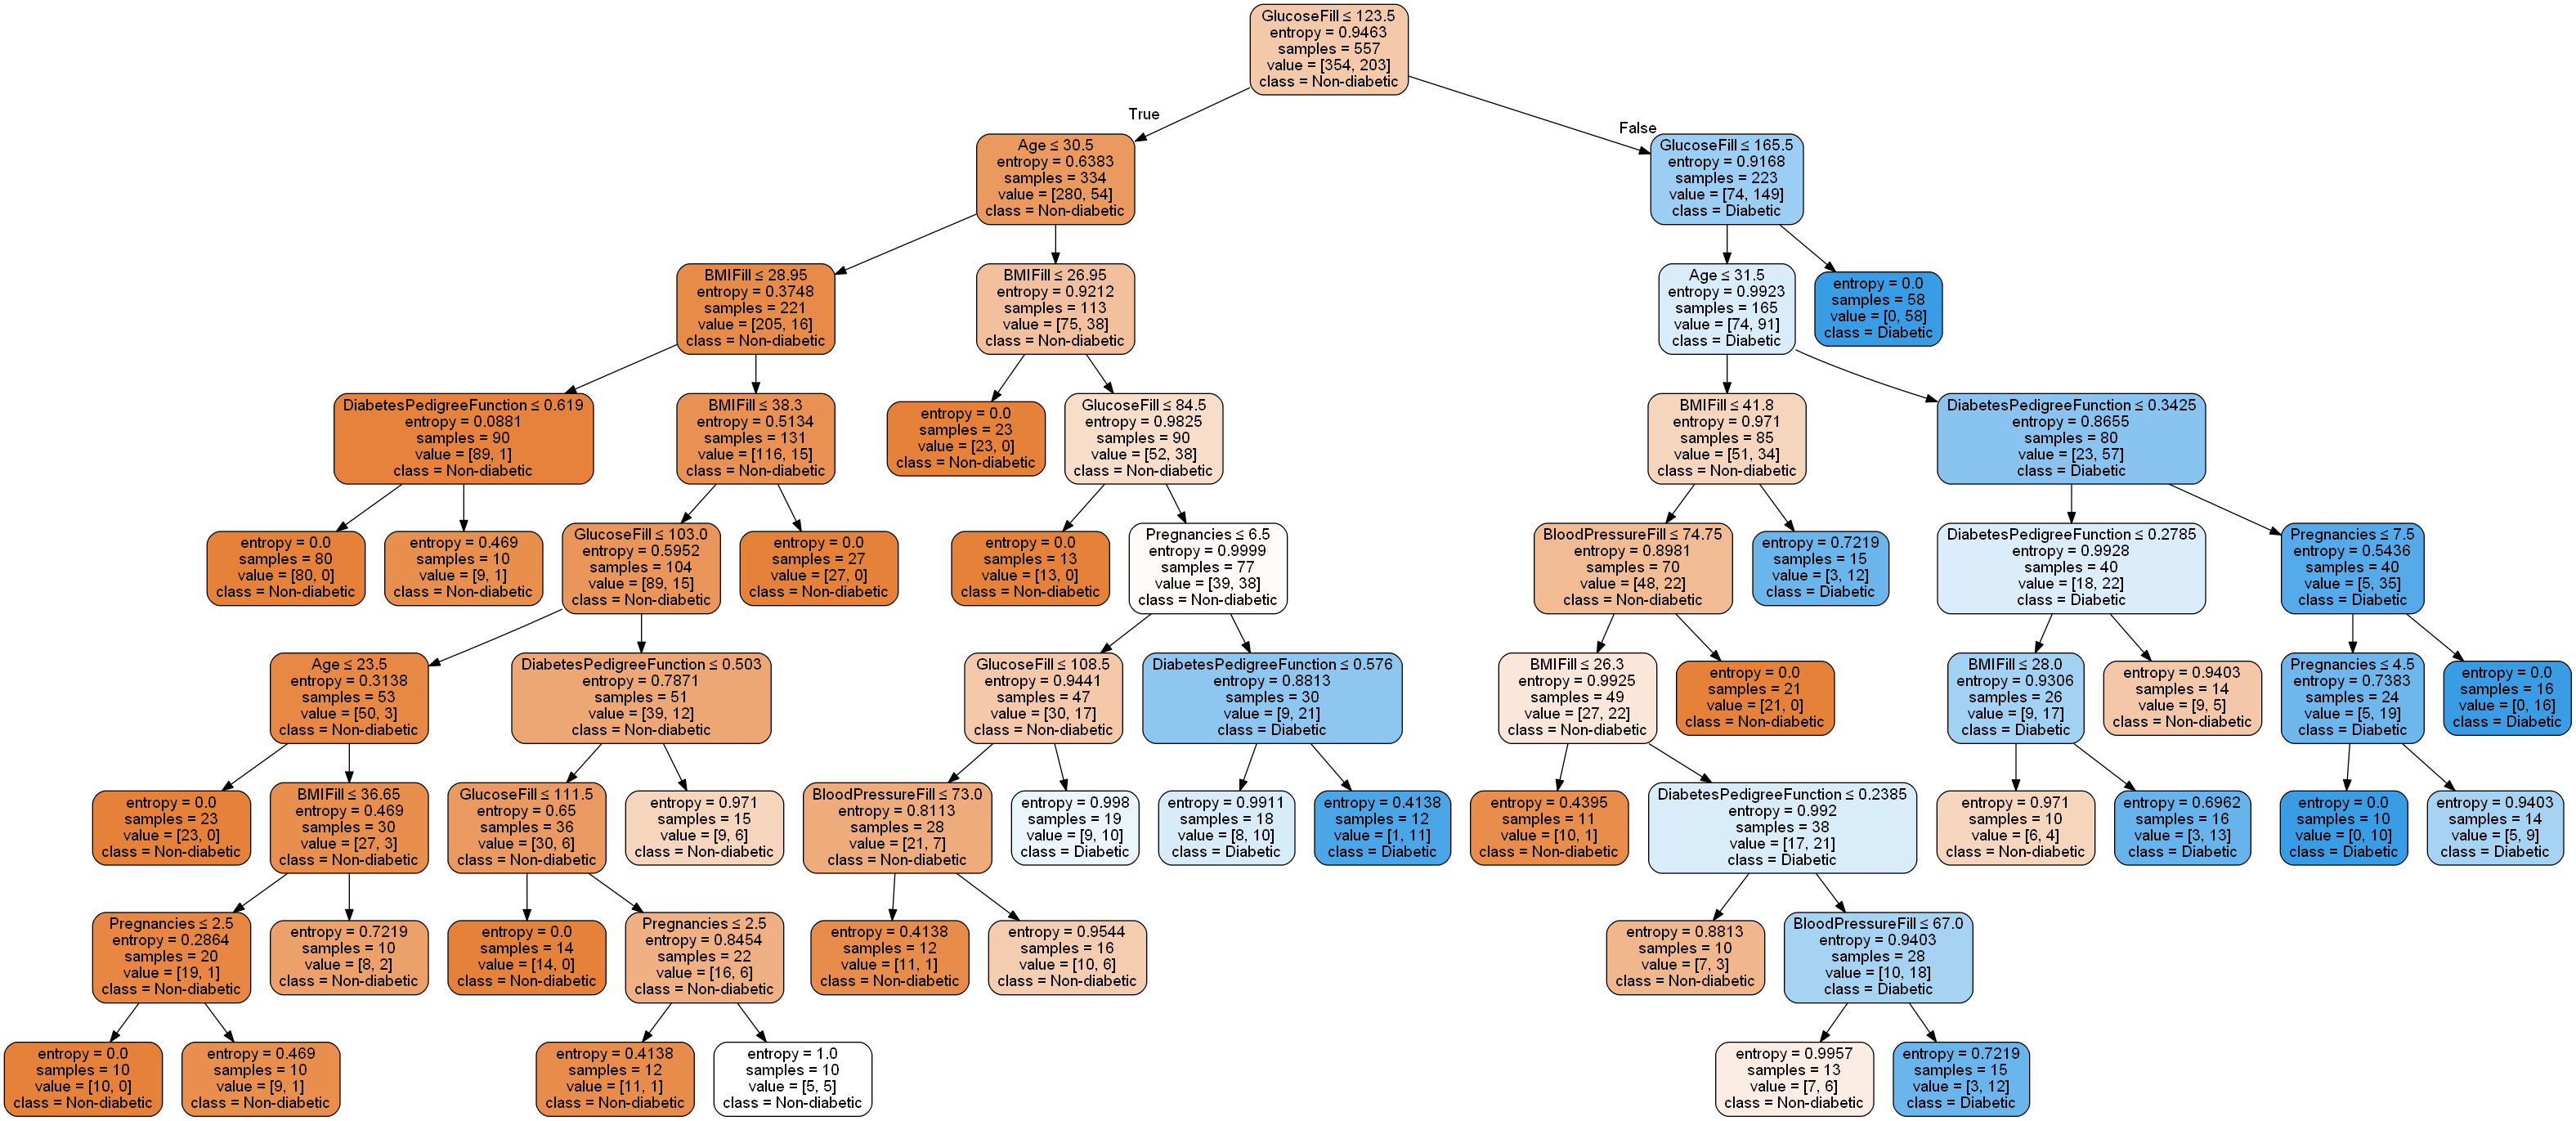

In [81]:
import pydotplus 
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=list(df_train.columns[0:6]),  
                         class_names=['Non-diabetic', 'Diabetic'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [82]:
cm = confusion_matrix(test_y, test_pred)
print cm

[[63 14]
 [20 43]]


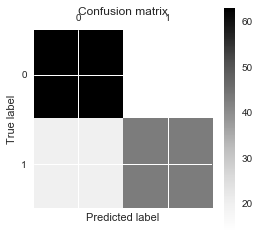

In [83]:
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

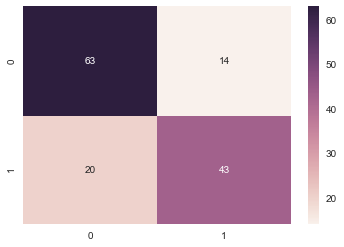

In [84]:
import seaborn as sns
label = ["0","1"]
sns.heatmap(cm, annot=True, xticklabels=label, yticklabels=label)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(test_y, 
                            test_pred, 
                            target_names=['Non-diabetic', 'Diabetic']))

              precision    recall  f1-score   support

Non-diabetic       0.76      0.82      0.79        77
    Diabetic       0.75      0.68      0.72        63

 avg / total       0.76      0.76      0.76       140



In [24]:
# cross validation
scores = cross_validation.cross_val_score(clf, train_features, train_target, cv=10)
print ('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.78 (+/- 0.14)


In [26]:
# Random Forest

clf = RandomForestClassifier(n_estimators=30, 
                             criterion='entropy',
                             max_features=None,
                             max_depth=None, 
                             min_samples_split=2,
                             min_samples_leaf=20,
                             bootstrap=True,
                             oob_score=False,
                             random_state=None,
                             class_weight=None) #balanced
scores = cross_validation.cross_val_score(clf, train_features, train_target, cv=10)
print ('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.80 (+/- 0.10)


In [29]:
lf = neighbors.KNeighborsClassifier(5, weights='distance')
scores = cross_validation.cross_val_score(lf, train_features, train_target, cv=10)
print ('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.76 (+/- 0.11)


In [31]:
lf = neighbors.KNeighborsClassifier(10, weights='distance')
scores = cross_validation.cross_val_score(lf, train_features, train_target, cv=10)
print ('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
lf = neighbors.KNeighborsClassifier(15, weights='distance')
scores = cross_validation.cross_val_score(lf, train_features, train_target, cv=10)
print ('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
lf = neighbors.KNeighborsClassifier(20, weights='distance')
scores = cross_validation.cross_val_score(lf, train_features, train_target, cv=10)
print ('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
lf = neighbors.KNeighborsClassifier(25, weights='distance')
scores = cross_validation.cross_val_score(lf, train_features, train_target, cv=10)
print ('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
lf = neighbors.KNeighborsClassifier(30, weights='distance')
scores = cross_validation.cross_val_score(lf, train_features, train_target, cv=10)
print ('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.76 (+/- 0.10)
Accuracy: 0.77 (+/- 0.09)
Accuracy: 0.77 (+/- 0.10)
Accuracy: 0.78 (+/- 0.09)
Accuracy: 0.77 (+/- 0.09)


In [32]:
from scipy.stats import randint as sp_randint

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

In [33]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [59]:
clf = RandomForestClassifier(n_estimators=20)

In [58]:
sp_randint(1, len(train_x[0]) + 1)

In [67]:
param_dist = {"max_depth": [2,3,4,5,6,7,8,9,10,11,12,None],
              "max_features": sp_randint(1, len(train_x[0]) + 1),
              "min_samples_split": sp_randint(10, 51),
              "min_samples_leaf": sp_randint(10, 51),
              "bootstrap": [True],
              "criterion": ["entropy", "gini"],
              "class_weight":['balanced', None, {0: 0.3, 1: 0.7}]}

n_iter_search = 100
search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=n_iter_search, 
                            n_jobs=10, scoring=make_scorer(accuracy_score))

In [68]:
search.fit(train_features, train_target)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=100, n_jobs=10,
          param_distributions={'class_weight': ['balanced', None, {0: 0.3, 1: 0.7}], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002288C60D6D8>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002288C60D940>, 'bootstrap': [True], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, None], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002288C60D860>, 'criterion': ['entropy', 'gini']},
      

In [69]:
report(search.cv_results_, 3) #search.best_estimator_.estimators_[0]

Model with rank: 1
Mean validation score: 0.795 (std: 0.038)
Parameters: {'class_weight': None, 'max_features': 5, 'min_samples_leaf': 11, 'bootstrap': True, 'criterion': 'gini', 'min_samples_split': 13, 'max_depth': 10}

Model with rank: 2
Mean validation score: 0.793 (std: 0.036)
Parameters: {'class_weight': 'balanced', 'max_features': 6, 'min_samples_leaf': 14, 'bootstrap': True, 'criterion': 'entropy', 'min_samples_split': 50, 'max_depth': 10}

Model with rank: 3
Mean validation score: 0.791 (std: 0.035)
Parameters: {'class_weight': None, 'max_features': 3, 'min_samples_leaf': 11, 'bootstrap': True, 'max_depth': 10, 'min_samples_split': 45, 'criterion': 'gini'}



In [64]:
param_grid = {"max_depth": [2,3,4,5,6,9]}
search = GridSearchCV(clf, param_grid=param_grid, scoring=make_scorer(accuracy_score))

In [65]:
search.fit(train_features, train_target)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(accuracy_score), verbose=0)

In [66]:
report(search.cv_results_, 3) #search.best_estimator_.estimators_[0]

Model with rank: 1
Mean validation score: 0.791 (std: 0.029)
Parameters: {'max_depth': 3}

Model with rank: 2
Mean validation score: 0.789 (std: 0.036)
Parameters: {'max_depth': 5}

Model with rank: 3
Mean validation score: 0.786 (std: 0.026)
Parameters: {'max_depth': 6}



In [57]:
search.best_estimator_.estimators_[0]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=455324315, splitter='best')

In [42]:
import pydotplus 
from IPython.display import Image  
dot_data = tree.export_graphviz(search.best_estimator_.estimators_[0], out_file=None, 
                         feature_names=list(df_train.columns[0:6]),  
                         class_names=['Non-diabetic', 'Diabetic'],  
                         filled=True, rounded=True,  
                         special_characters=True,
                               max_depth=5)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())


InvocationException: GraphViz's executables not found